# Let's predict the price of an apartment by its area

We will use simple linear regression model (Y = ax+b, least squares method)

## Uploading data

In [2]:
# import libs and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
# data import and visualization

df = pd.read_excel('to_train.xlsx')
print(df)

   area  price
0    28    3.1
1    42    3.8
2    45    3.9
3    52    4.4
4    56    4.5
5    68    5.9
6    70    5.6
7    75    6.4
8    90    7.3


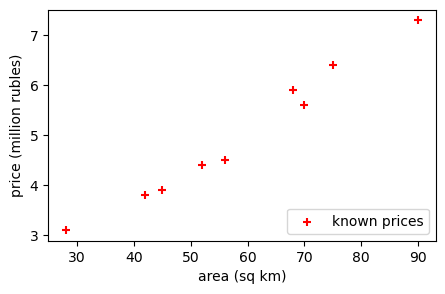

In [108]:
# plotting a graph

plt.scatter(df.area, df.price, color='red', marker='+', label='known prices')
plt.xlabel('area (sq km)')
plt.ylabel('price (million rubles)')
plt.legend(prop={'size': 10}, loc="lower right")

## Training and cheking the linear model

In [109]:
# train the model

model = linear_model.LinearRegression()
model.fit(df[['area']].values, df[['price']].values)

LinearRegression()

In [110]:
# checking how our model learned

check = model.predict(df[['area']].values)
check_df = pd.DataFrame(check)

print("Original data:\n", df)
print()
print("Predicted data:\n", check_df)

Original data:
    area  price
0    28    3.1
1    42    3.8
2    45    3.9
3    52    4.4
4    56    4.5
5    68    5.9
6    70    5.6
7    75    6.4
8    90    7.3

Predicted data:
           0
0  2.812647
1  3.813401
2  4.027848
3  4.528225
4  4.814154
5  5.671943
6  5.814908
7  6.172319
8  7.244555


In [111]:
# we can see a and b coefficients

# Price = a*Area+b

a = model.coef_
b = model.intercept_

a = round(a.tolist()[0][0], 2)
b = round(b.tolist()[0], 2)
      
print(f"The model is Y = {a}*X + {b}")

The model is Y = 0.07*X + 0.81


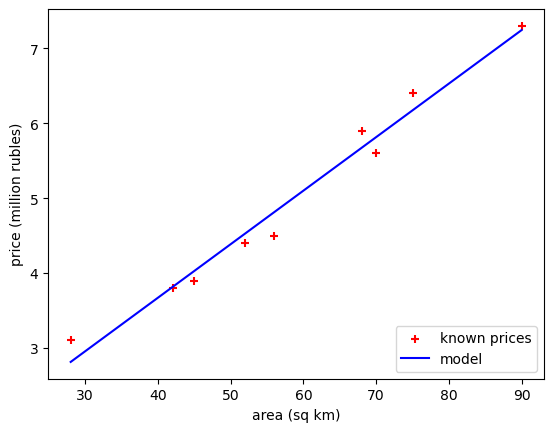

In [115]:
# plotting the model

plt.scatter(df.area, df.price, color='red', marker='+', label='known prices')
plt.plot(df.area, check, color='blue', label='model')
plt.xlabel('area (sq km)')
plt.ylabel('price (million rubles)')
plt.legend(prop={'size': 10}, loc="lower right")

## Using the model for prediction

In [124]:
# import data and getting a prediction

flats = pd.read_excel('to_predict.xlsx')
print(flats.head(3))

pred_prices = model.predict(flats.values)

   area
0    25
1    37
2    40


In [128]:
# save the predictions to an excel file

flats['predicted price'] = pred_prices
flats.to_excel('result.xlsx', index=False)

So, we used a simple linear regression to predict flat prices